# Oasis Infobyte-Data Science Internship


## Task 5 - Sales Prediction Using Python

### Name : Mulani Sharukh Babasaheb

In [45]:
# Import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [46]:
data = pd.read_csv('Advertising.csv')

In [47]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [48]:
data=data.drop('Unnamed: 0',axis=1)

In [49]:
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [50]:
data.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [51]:
data.shape

(200, 4)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [53]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [54]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [55]:
#check null values

data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<p>There is no any null values</p>

In [56]:
#check duplicates value
data.duplicated().value_counts()

False    200
dtype: int64

# Visulization

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

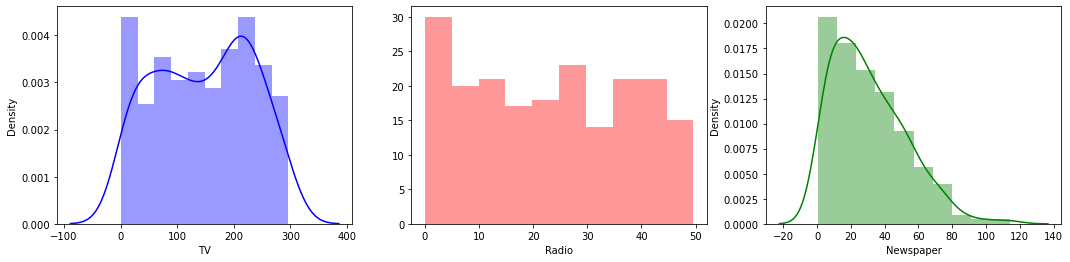

In [57]:
#Univariant analysis

plt.rcParams['figure.figsize']=(18,4)

plt.subplot(1,3,1)
sns.distplot(data['TV'], kde=True, color='Blue', bins=10 )# FOR tv

plt.subplot(1,3,2)
sns.distplot(data['Radio'], kde=False ,color='red', bins=10) # FOR radio

plt.subplot(1,3,3)
sns.distplot(data['Newspaper'],kde=True,color='green', bins=10) # FOR newspaper

<AxesSubplot:xlabel='Sales', ylabel='Density'>

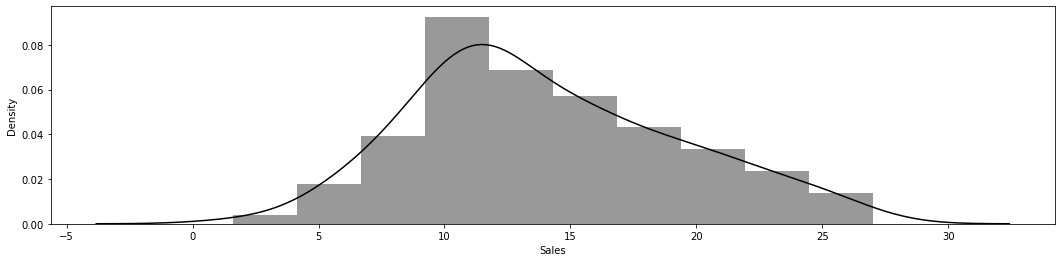

In [58]:
sns.distplot(data['Sales'], kde=True,color='black', bins=10)# FOR sale

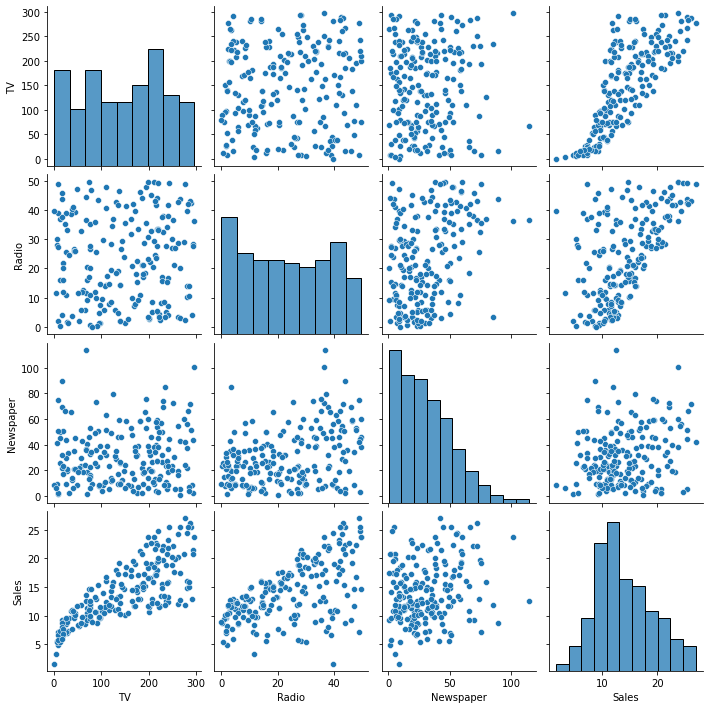

In [59]:
#Pair plot

sns.pairplot(data)

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

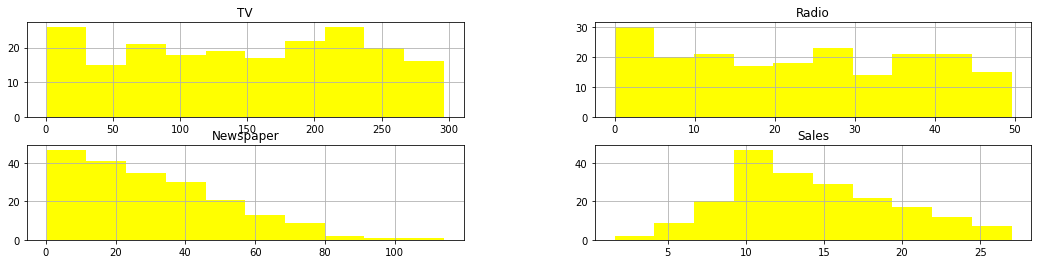

In [60]:
data.hist(bins=10,color="yellow")

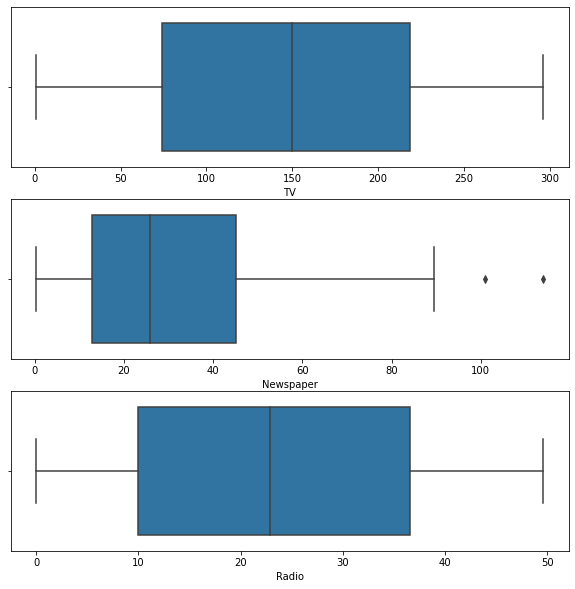

In [61]:
#check Outlier

fig, axs =plt.subplots(3, figsize =(10,10))
plt1 = sns.boxplot(data["TV"], ax = axs[0])
plt2 = sns.boxplot(data["Newspaper"], ax = axs[1])
plt3 = sns.boxplot(data["Radio"], ax = axs[2])
plt.show()

In [62]:
#Remove outlier

Q1=data['Newspaper'].quantile(0.25)
Q3=data['Newspaper'].quantile(0.75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
data = data[~((data['Newspaper'] < (Q1 - 1.5 * IQR)) |(data['Newspaper'] > (Q3 + 1.5 * IQR)))]

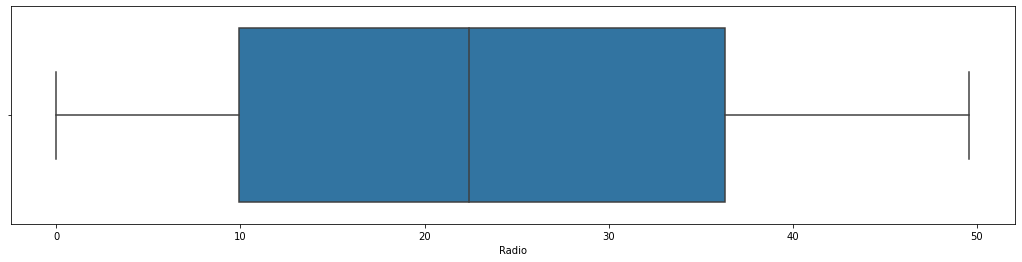

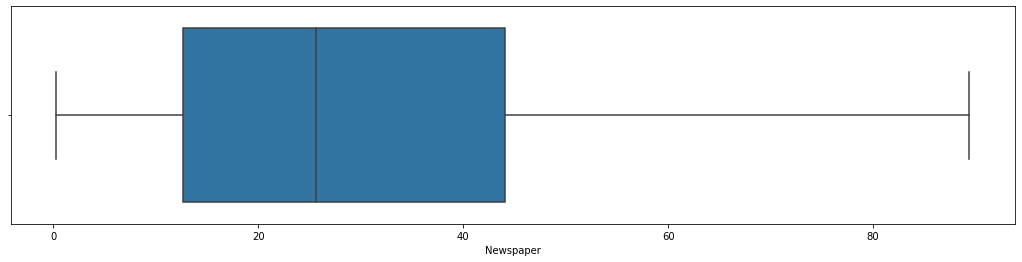

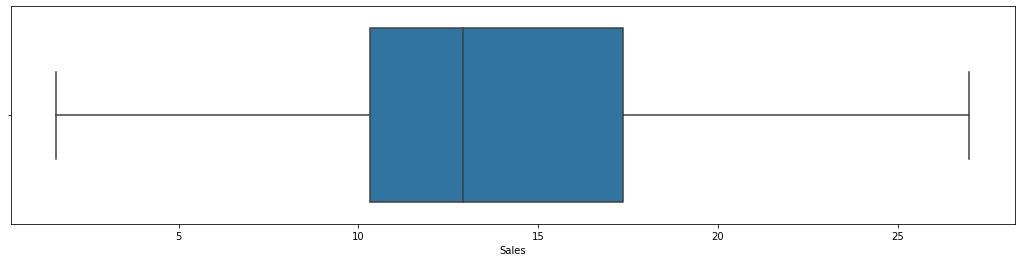

In [63]:
#Check removed outliers

for i in data.columns[1:]:
  sns.boxplot(data[i])
  plt.show()

In [64]:
#check co-relation

data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


<AxesSubplot:>

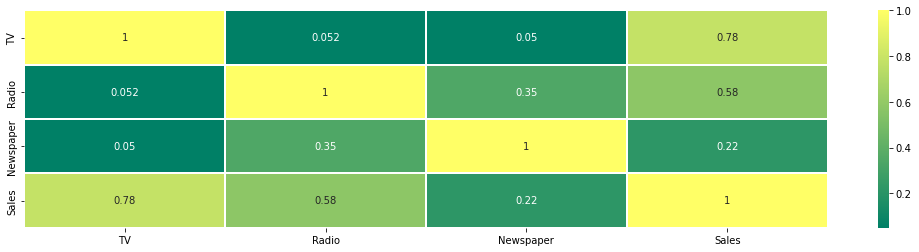

In [65]:
sns.heatmap(data.corr(),annot=True, linewidth = 2, cmap = 'summer')

In [66]:
X = data[['TV','Radio','Newspaper']]
y = data[["Sales"]]

In [67]:
# split data into training and testing
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [68]:
X_train

,TV,Radio,Newspaper
109,255.4,26.9,5.5
108,13.1,0.4,25.6
57,136.2,19.2,16.6
14,204.1,32.9,46.0
115,75.1,35.0,52.7
...,...,...,...
135,48.3,47.0,8.5
139,184.9,43.9,1.7
73,129.4,5.7,31.3
142,220.5,33.2,37.9


In [69]:
X_test

,TV,Radio,Newspaper
177,170.2,7.8,35.2
41,177.0,33.4,38.7
35,290.7,4.1,8.5
91,28.6,1.5,33.0
147,243.2,49.0,44.3
184,253.8,21.3,30.0
96,197.6,3.5,5.9
4,180.8,10.8,58.4
30,292.9,28.3,43.2
169,284.3,10.6,6.4


In [70]:
y_train

,Sales
109,19.8
108,5.3
57,13.2
14,19.0
115,12.6
...,...
135,11.6
139,20.7
73,11.0
142,20.1


In [71]:
y_test

,Sales
177,11.7
41,17.1
35,12.8
91,7.3
147,25.4
184,17.6
96,11.7
4,12.9
30,21.4
169,15.0


In [72]:
x_train=X_train.astype(int)#  integer type from float
y_train=y_train.astype(int)# nteger type from float
x_test=X_test.astype(int)# integer type from float
y_test=y_test.astype(int)# integer type from float

In [73]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()

In [74]:
X_train_scaled=Sc.fit_transform(X_train)

X_test_scaled=Sc.fit_transform(X_test)

# Modeling data

In [75]:
#Linear Regression

from sklearn.linear_model import LinearRegression

In [76]:
#Model Building

model = LinearRegression()

In [77]:
#Fitt the model 
model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = model.predict(X_test)

In [79]:
y_pred

array([[11.74470901],
       [16.8401582 ],
       [16.83209544],
       [ 3.82456355],
       [22.89778007],
       [18.25405261],
       [12.28708511],
       [12.7787242 ],
       [21.40572318],
       [17.74257239],
       [20.09612287],
       [13.67851488],
       [16.92905383],
       [16.87271659],
       [ 9.14176578],
       [ 6.10554664],
       [ 6.55867288],
       [23.10920825],
       [13.46824335],
       [17.7575088 ],
       [20.26499005],
       [22.9491604 ],
       [14.72562255],
       [ 9.94104557],
       [ 7.09756426],
       [ 9.22975263],
       [20.081601  ],
       [ 8.52083308],
       [11.55807938],
       [19.10728772],
       [15.93394692],
       [10.06479144],
       [ 5.11981529],
       [ 9.25393073],
       [18.14605453],
       [19.08960116],
       [ 9.07954438],
       [15.80895096],
       [ 9.15930858],
       [13.89765035]])

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [81]:
print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 3.0458224994533483


In [82]:
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

Mean absolute error: 1.3291668099617364


In [83]:
print('squared:', r2_score(y_test, y_pred))

squared: 0.8829627032559534


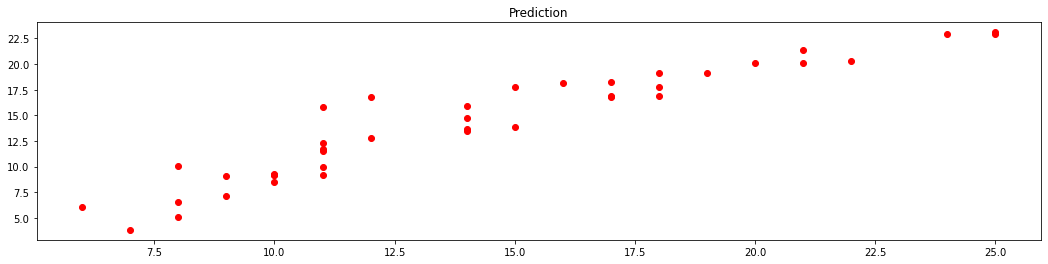

In [84]:
plt.scatter(y_test,y_pred,c="red")

plt.title("Prediction")

plt.show()

# Conclusion :-

<p>Based on the previous data, a linear regression model was constructed to find realtions between the data with an accuracy of about 85 %. The model was trained with an "advertising data set" and the results show how linear regression plays a role in improving this particular problem.</p>